In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Commit_Test_Folder/colab_practice2

/content/drive/MyDrive/Commit_Test_Folder/colab_practice2


In [ ]:
!git config --global user.email 'jgys014@naver.com'
!git config --global user.name 'J'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install cartopy
import cartopy
import cartopy.crs as ccrs

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Yeongsil_Miracle/mhw_event_all.csv')
df['date_peak'] = pd.to_datetime(df['date_peak'])
df['year'] = df['date_peak'].dt.year
df['month'] = df['date_peak'].dt.month
df['day'] = df['date_peak'].dt.day
def get_season(month):
    if 1 <= month <= 3:
        return 'JFM'
    elif 4 <= month <= 6:
        return 'AMJ'
    elif 7 <= month <= 9:
        return 'JAS'
    else:
        return 'OND'

df['season'] = df['month'].apply(get_season)
df.dropna(inplace = True)#Remove Missing Values

In [ ]:
df["symmetry1"] = df["index_peak"] - df["index_start"]
df["symmetry2"] = df["index_end"] - df["index_peak"]
df_clustering = df[[ "duration" ,
                    "intensity_var" ,"intensity_max", "intensity_mean","intensity_max_relThresh",
                    "symmetry1" , "symmetry2",
                    "rate_onset" , "rate_decline"]]

In [ ]:
#scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters= 4, init = "k-means++",random_state= 42)
df_clustering['cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-91-c5db558ad206>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['cluster'] = kmeans.fit_predict(scaled_data)


<ipython-input-92-82ccdd63dcdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['pca1'] = pca_result[:, 0]
<ipython-input-92-82ccdd63dcdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['pca2'] = pca_result[:, 1]


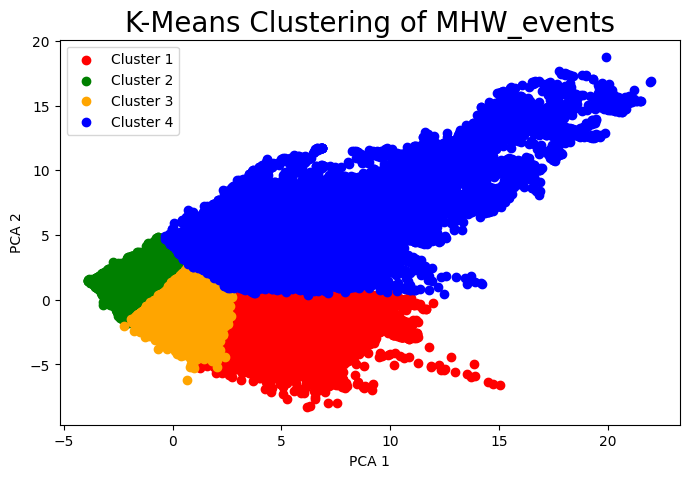

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df_clustering['pca1'] = pca_result[:, 0]
df_clustering['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 5))
cluster_labels = sorted(df_clustering['cluster'].unique())
colors = ['r', 'g', 'orange', 'b']
for cluster in cluster_labels :
    plt.scatter(df_clustering[df_clustering['cluster'] == cluster]['pca1'],
                df_clustering[df_clustering['cluster'] == cluster]['pca2'],
                label=f'Cluster {cluster + 1}' ,c=colors[cluster])
plt.legend()
plt.title("K-Means Clustering of MHW_events" , fontsize = 20)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

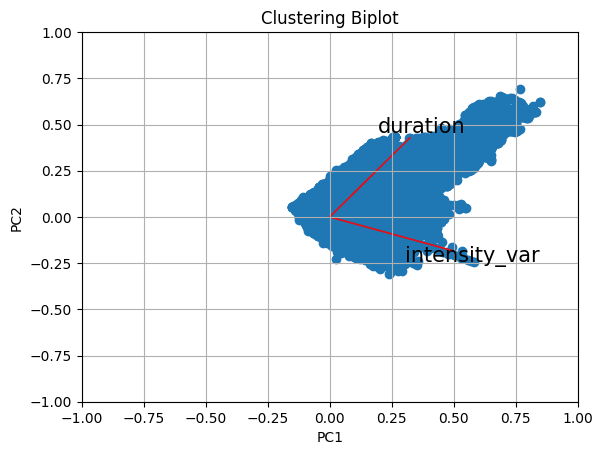

In [ ]:
pca_data = PCA(n_components=2)
pca_data.fit(scaled_data)
B = pca_data .transform(scaled_data)
def biplot(score,coeff, pcax, pcay,labels=None):
  pca1= pcax-1
  pca2= pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.8)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='b', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='k', ha='center', va='center' , fontsize = 15)
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()
  plt.title("Clustering Biplot")
biplot(B, pca_data.components_, 1, 2, labels= df_clustering.columns)

## **comprehension of Clustering**

In [ ]:
df["cluster"] = df_clustering["cluster"]
cluster1 = df[df["cluster"] == 0]
cluster2 = df[df["cluster"] == 1]
cluster3 = df[df["cluster"] == 2]
cluster4 = df[df["cluster"] == 3]
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

cluster_count

In [ ]:
df_count = pd.DataFrame(df_clustering["cluster"].value_counts().values ,clusters )
df_count.columns = ["Cluster Count"]

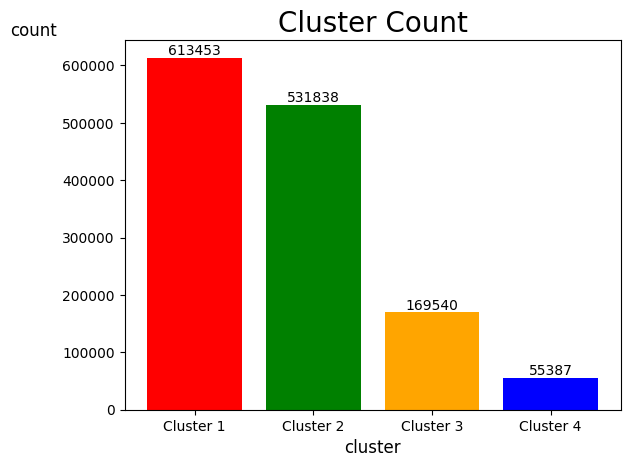

In [ ]:
plt.bar(clusters, df_count["Cluster Count"].values , color=['r', 'g', 'orange', 'blue'])
for i, count in enumerate(df_count["Cluster Count"].values):
  plt.text(clusters[i], count, str(count), ha='center', va='bottom')
plt.title('Cluster Count' , fontsize = 20)
plt.xlabel('cluster', fontsize = 12)
plt.ylabel('count', fontsize = 12, rotation=0 ,loc = "top")
plt.show()

Duration

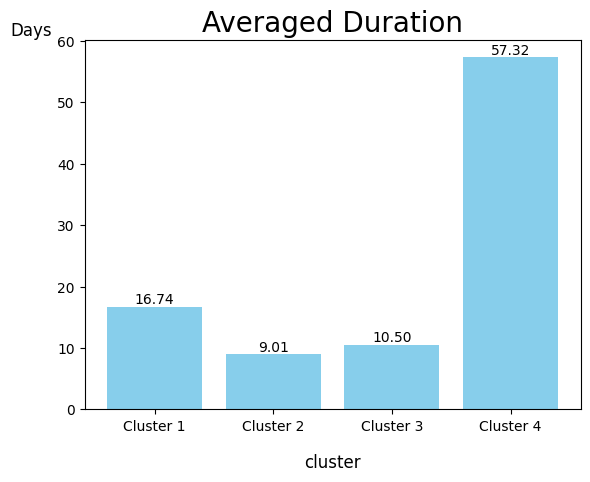

In [ ]:
cluster1_duration = cluster1['duration'].mean()
cluster2_duration = cluster2['duration'].mean()
cluster3_duration = cluster3['duration'].mean()
cluster4_duration = cluster4['duration'].mean()
durations = [cluster1_duration, cluster2_duration, cluster3_duration, cluster4_duration]

plt.bar(clusters, durations, color='skyblue')
plt.title('Averaged Duration' , fontsize = 20)
plt.xlabel('cluster', fontsize = 12 ,labelpad=15)
plt.ylabel('Days' ,fontsize = 12, rotation=0 ,loc = "top")
for i, duration in enumerate(durations):
    plt.text(clusters[i], duration, f'{duration:.2f}', ha='center', va='bottom')
plt.show()

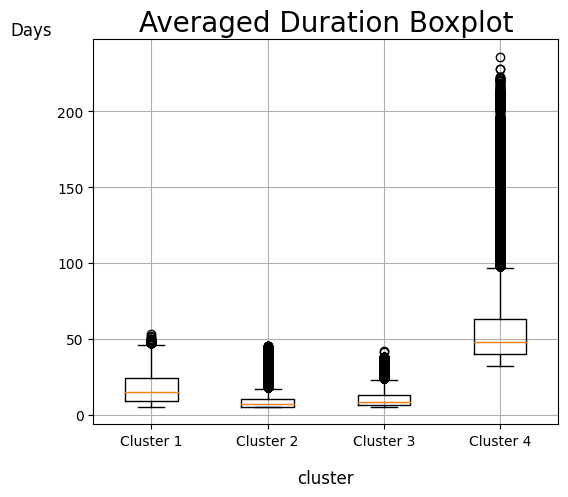

In [ ]:
plt.figure(figsize=(6,5))
plt.title("Averaged Duration Boxplot", fontsize = 20)
plt.xlabel('cluster', fontsize = 12 ,labelpad=15)
plt.ylabel('Days' ,fontsize = 12, rotation=0 ,loc = "top")
plt.grid(True)
plt.boxplot([cluster1['duration'], cluster2['duration'], cluster3['duration'], cluster4['duration']],
            labels=["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])
plt.show()

Intensity

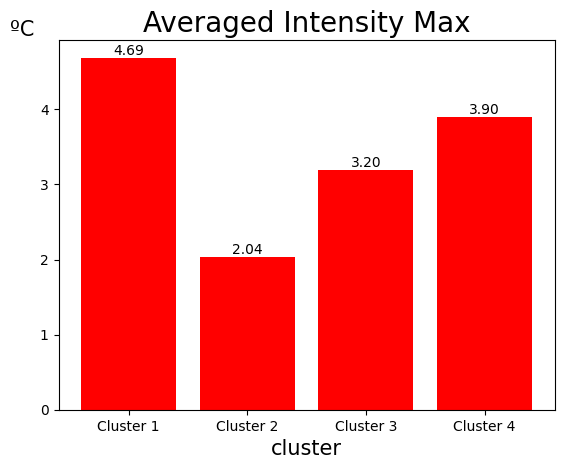

In [ ]:
cluster1_intensity_max = cluster1['intensity_max'].mean()
cluster2_intensity_max = cluster2['intensity_max'].mean()
cluster3_intensity_max = cluster3['intensity_max'].mean()
cluster4_intensity_max = cluster4['intensity_max'].mean()

intensity_maxs = [cluster1_intensity_max, cluster2_intensity_max, cluster3_intensity_max, cluster4_intensity_max]
plt.bar(clusters, intensity_maxs, color='red')
plt.title('Averaged Intensity Max',fontsize = 20)
plt.xlabel('cluster' ,fontsize = 15)
plt.ylabel('ºC',fontsize = 15 , rotation=0 ,loc = "top")
for i, intensity_max in enumerate(intensity_maxs):
    plt.text(clusters[i], intensity_max, f'{intensity_max:.2f}', ha='center', va='bottom')
plt.show()

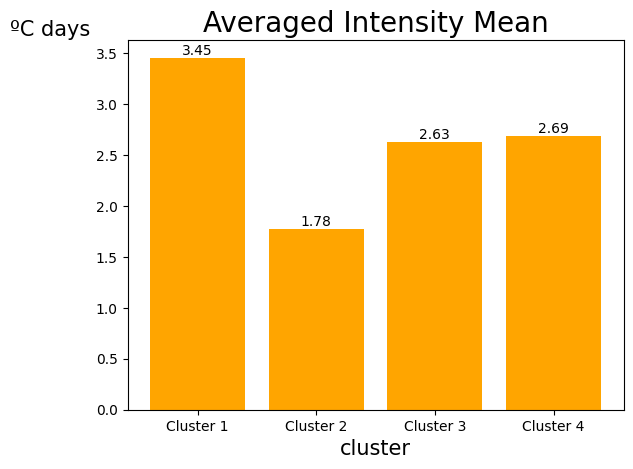

In [ ]:
cluster1_intensity_mean = cluster1['intensity_mean'].mean()
cluster2_intensity_mean = cluster2['intensity_mean'].mean()
cluster3_intensity_mean = cluster3['intensity_mean'].mean()
cluster4_intensity_mean = cluster4['intensity_mean'].mean()
intensity_means = [cluster1_intensity_mean ,cluster2_intensity_mean, cluster3_intensity_mean, cluster4_intensity_mean]
plt.bar(clusters, intensity_means , color='orange')
plt.title('Averaged Intensity Mean',fontsize = 20)
plt.xlabel('cluster' ,fontsize = 15)
plt.ylabel('ºC days',fontsize = 15 , rotation=0 ,loc = "top")
for i, intensity_mean in enumerate(intensity_means):
    plt.text(clusters[i], intensity_mean, f'{intensity_mean:.2f}', ha='center', va='bottom')
plt.show()

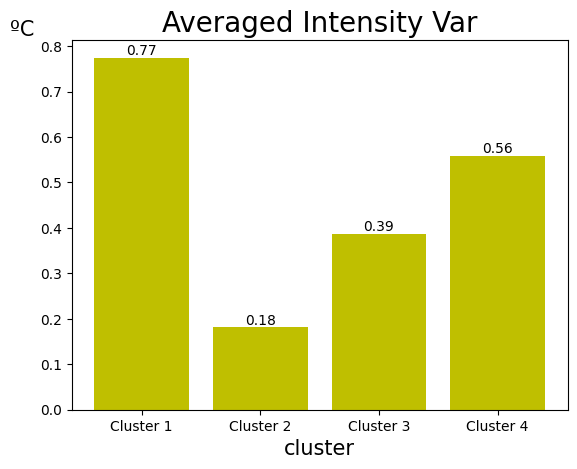

In [ ]:
cluster1_intensity_var = cluster1['intensity_var'].mean()
cluster2_intensity_var = cluster2['intensity_var'].mean()
cluster3_intensity_var = cluster3['intensity_var'].mean()
cluster4_intensity_var = cluster4['intensity_var'].mean()
intensity_vars = [cluster1_intensity_var, cluster2_intensity_var, cluster3_intensity_var, cluster4_intensity_var]
plt.bar(clusters, intensity_vars , color='y')
plt.title('Averaged Intensity Var',fontsize = 20)
plt.xlabel('cluster' ,fontsize = 15)
plt.ylabel('ºC',fontsize = 15 , rotation=0 ,loc = "top")
for i, intensity_var in enumerate(intensity_vars):
    plt.text(clusters[i], intensity_var, f'{intensity_var:.2f}', ha='center', va='bottom')
plt.show()

Seasonal

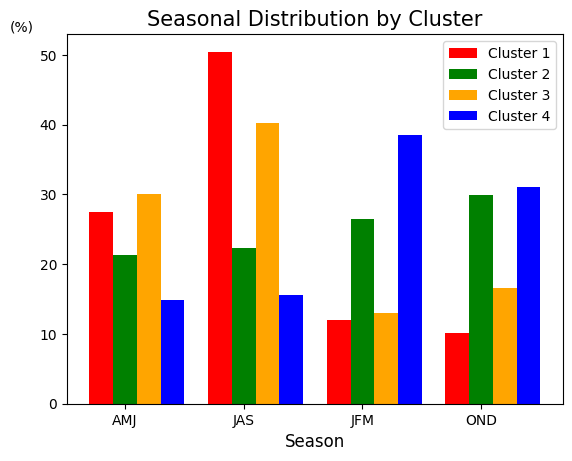

In [ ]:
cluster1_season_counts = cluster1['event_no'].groupby(cluster1['season']).count()
cluster2_season_counts = cluster2['event_no'].groupby(cluster2['season']).count()
cluster3_season_counts = cluster3['event_no'].groupby(cluster3['season']).count()
cluster4_season_counts = cluster4['event_no'].groupby(cluster4['season']).count()
cluster1_season_ratios = cluster1_season_counts / cluster1_season_counts.sum() *100
cluster2_season_ratios = cluster2_season_counts / cluster2_season_counts.sum() *100
cluster3_season_ratios = cluster3_season_counts / cluster3_season_counts.sum() *100
cluster4_season_ratios = cluster4_season_counts / cluster4_season_counts.sum() *100

seasons = cluster1_season_counts.index
width = 0.2
x = range(len(seasons))
plt.bar([i - width for i in x], cluster1_season_ratios, width=width, label='Cluster 1', color='r')
plt.bar(x, cluster2_season_ratios, width=width, label='Cluster 2', color='g')
plt.bar([i + width for i in x], cluster3_season_ratios, width=width, label='Cluster 3', color='orange')
plt.bar([i + 2 * width for i in x], cluster4_season_ratios, width=width, label='Cluster 4', color='b')
plt.title('Seasonal Distribution by Cluster' , fontsize = 15)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('(%)', rotation=0 ,loc = "top")
plt.xticks(x, seasons)
plt.legend()
plt.show()

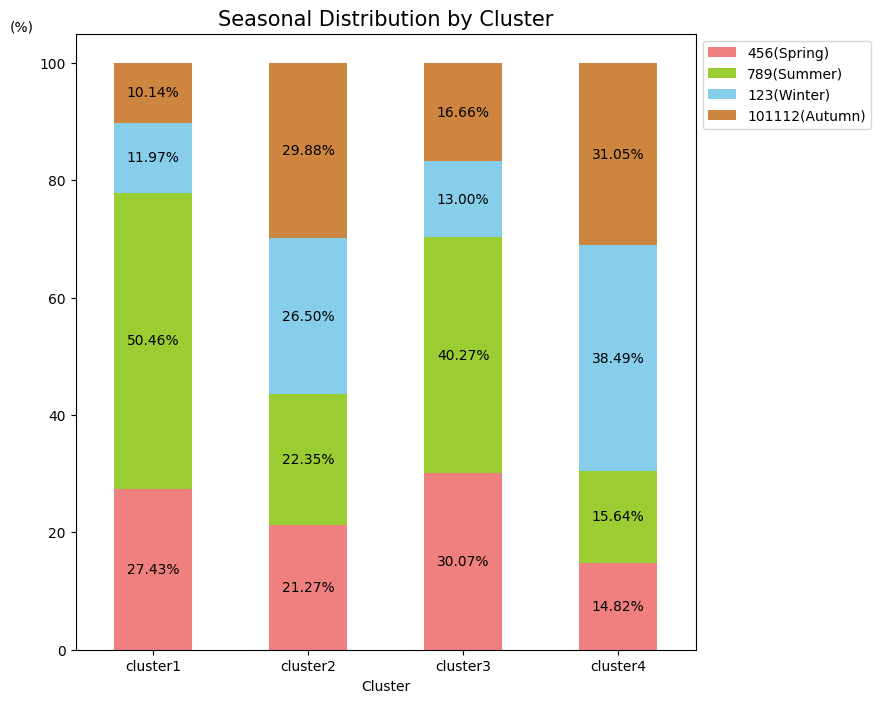

In [ ]:
cluster_counts = []
cluster_labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4']
colors = ['lightcoral', 'yellowgreen', 'skyblue' ,'peru']
for cluster_label in cluster_labels:
    cluster_df = globals()[cluster_label]
    season_counts = cluster_df.groupby('season')['event_no'].count()
    total_events = season_counts.sum()
    season_ratios = (season_counts / total_events) * 100
    cluster_counts.append(season_ratios)

cluster_season_df = pd.DataFrame(cluster_counts, index=cluster_labels)
ax = cluster_season_df.plot(kind='bar', stacked=True, figsize=(8,8),fontsize=10 , color = colors)
ax.set_xlabel('Cluster')
ax.set_ylabel('(%)', rotation=0, loc="top")
ax.set_title('Seasonal Distribution by Cluster', fontsize=15)
plt.xticks(rotation=0)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    x_centered = x + width / 2
    y_centered = y + height / 2
    value = cluster_season_df.iloc[ i % len(cluster_labels) ,i // len(cluster_labels)]
    ax.annotate(f'{value:.2f}%', (x_centered, y_centered), color='black', fontsize=10, ha='center', va='center')

legend_labels = ['456(Spring)', '789(Summer)', '123(Winter)', '101112(Autumn)']
ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

month

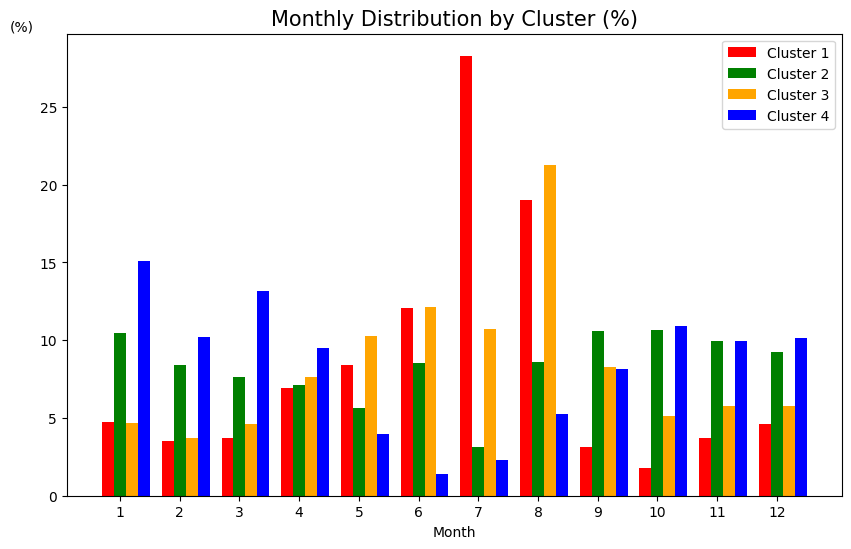

In [ ]:
cluster1_month_counts = cluster1['event_no'].groupby(cluster1['month']).count()
cluster2_month_counts = cluster2['event_no'].groupby(cluster2['month']).count()
cluster3_month_counts = cluster3['event_no'].groupby(cluster3['month']).count()
cluster4_month_counts = cluster4['event_no'].groupby(cluster4['month']).count()
cluster1_month_ratios = (cluster1_month_counts / cluster1_month_counts.sum()) * 100
cluster2_month_ratios = (cluster2_month_counts /  cluster2_month_counts.sum()) * 100
cluster3_month_ratios = (cluster3_month_counts /  cluster3_month_counts.sum()) * 100
cluster4_month_ratios = (cluster4_month_counts /  cluster4_month_counts.sum()) * 100

months = [int(idx) for idx in cluster1_month_counts.index]
width = 0.2
x = range(len(months))
plt.figure(figsize = (10 ,6))
plt.bar([i - width for i in x], cluster1_month_ratios, width=width, label='Cluster 1', color='r')
plt.bar(x, cluster2_month_ratios, width=width, label='Cluster 2', color='g')
plt.bar([i + width for i in x], cluster3_month_ratios, width=width, label='Cluster 3', color='orange')
plt.bar([i + 2 * width for i in x], cluster4_month_ratios, width=width, label='Cluster 4', color='b')
plt.title('Monthly Distribution by Cluster (%)' , fontsize = 15)
plt.xlabel('Month')
plt.ylabel('(%)', rotation=0, loc="top")
plt.xticks(x, months)
plt.legend()
plt.show()

Year

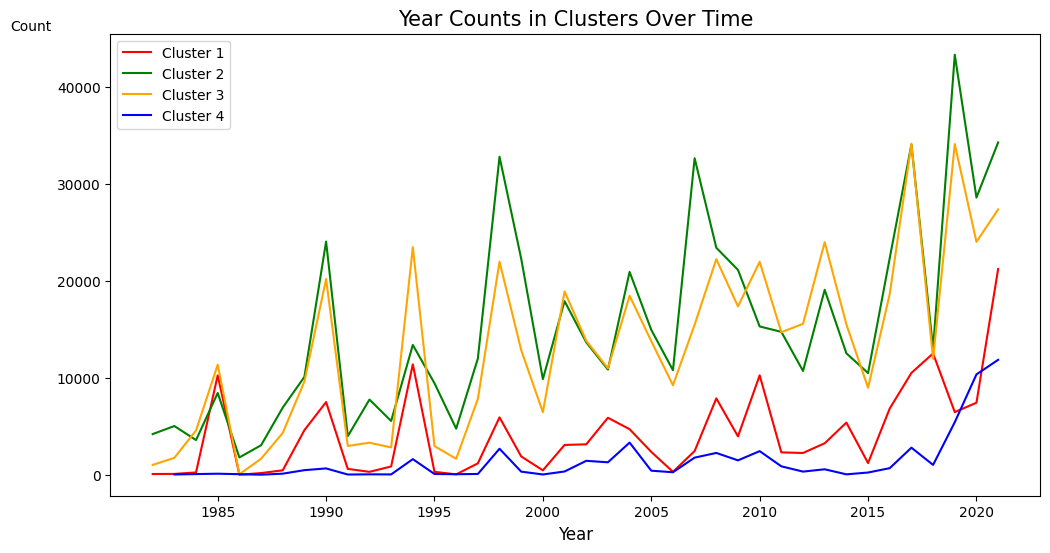

In [ ]:
year_counts_cluster1 = cluster1["year"].value_counts().sort_index()
year_counts_cluster2 = cluster2["year"].value_counts().sort_index()
year_counts_cluster3 = cluster3["year"].value_counts().sort_index()
year_counts_cluster4 = cluster4["year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(year_counts_cluster1.index, year_counts_cluster1.values, label='Cluster 1', color='r')
plt.plot(year_counts_cluster2.index, year_counts_cluster2.values, label='Cluster 2', color='green')
plt.plot(year_counts_cluster3.index, year_counts_cluster3.values, label='Cluster 3', color='orange')
plt.plot(year_counts_cluster4.index, year_counts_cluster4.values, label='Cluster 4', color='blue')

plt.title("Year Counts in Clusters Over Time" , fontsize = 15)
plt.xlabel("Year" , fontsize = 12)
plt.ylabel("Count", rotation=0, loc="top")
plt.legend()

plt.show()

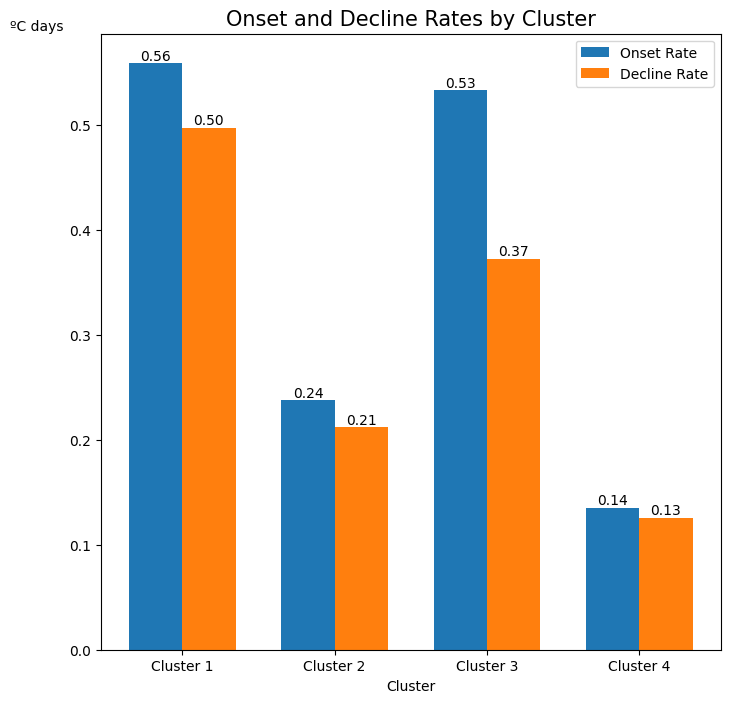

In [ ]:
onset_rates = [cluster1['rate_onset'].mean(), cluster2['rate_onset'].mean(), cluster3['rate_onset'].mean(), cluster4['rate_onset'].mean()]
decline_rates = [cluster1['rate_decline'].mean(), cluster2['rate_decline'].mean(), cluster3['rate_decline'].mean(), cluster4['rate_decline'].mean()]

bar_width = 0.35
bar_positions = np.arange(len(clusters))

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(bar_positions - bar_width / 2, onset_rates, bar_width, label='Onset Rate')
ax.bar(bar_positions + bar_width / 2, decline_rates, bar_width, label='Decline Rate')
for i in range(len(clusters)):
    ax.text(bar_positions[i] - bar_width / 2, onset_rates[i], f'{onset_rates[i]:.2f}', ha='center', va='bottom')
    ax.text(bar_positions[i] + bar_width / 2, decline_rates[i], f'{decline_rates[i]:.2f}', ha='center', va='bottom')

ax.set_xlabel('Cluster')
ax.set_ylabel('ºC days', rotation=0, loc="top")
ax.set_title('Onset and Decline Rates by Cluster' , fontsize = 15)
ax.set_xticks(bar_positions)
ax.set_xticklabels(clusters)
ax.legend()
plt.show()

cluster_region

In [ ]:
cluster_counts = df.groupby(["lat", "long", "cluster"]).size().reset_index(name="count")
cluster1_count = cluster_counts[cluster_counts['cluster'] ==0]
cluster2_count = cluster_counts[cluster_counts['cluster'] ==1]
cluster3_count = cluster_counts[cluster_counts['cluster'] ==2]
cluster4_count = cluster_counts[cluster_counts['cluster'] ==3]
cluster_counts = [cluster1_count,cluster2_count,cluster3_count,cluster4_count]

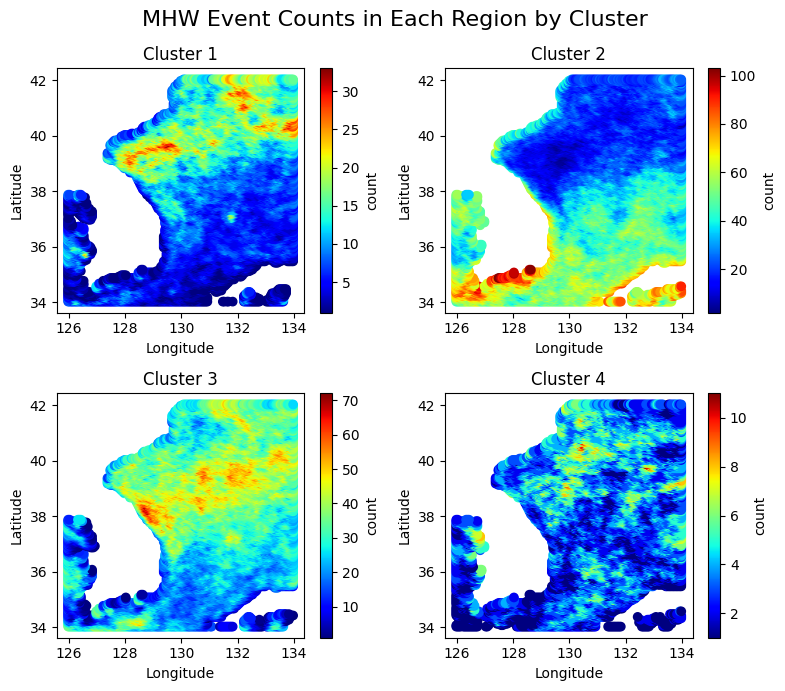

In [ ]:
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8,7))
cmap = plt.get_cmap('jet')
for i, cluster_data in enumerate(cluster_counts):
    row = i // num_cols
    col = i % num_cols
    lats = cluster_data['lat'].values
    lons = cluster_data['long'].values
    count = cluster_data['count'].values
    scatter = axes[row, col].scatter(lons, lats, c=count, cmap=cmap)
    axes[row, col].set_xlabel('Longitude')
    axes[row, col].set_ylabel('Latitude')
    axes[row, col].set_title(f'Cluster {i + 1}')
    cbar = plt.colorbar(scatter, ax=axes[row, col])
    cbar.set_label('count')
fig.suptitle("MHW Event Counts in Each Region by Cluster", fontsize=16)
plt.tight_layout()
plt.show()


this code is for "Vertical_distribution_characteristics_by_cluster_ESROB.ipynb"


ESROB_location_mhw_clustering.csv

In [ ]:
df['lat'] = df['lat'].round(3)
df['long'] = df['long'].round(3)

In [ ]:
desired_lat = 37.525
desired_lon = 129.225
row_indices = df.index[(df["lat"] == desired_lat) & (df["long"] == desired_lon)]
df_clustering_data = df.loc[row_indices]
df_clustering_data

,event_no,index_start,index_peak,index_end,duration,date_start,date_peak,date_end,intensity_mean,intensity_max,...,rate_decline,lat,long,year,month,day,season,symmetry1,symmetry2,cluster
608366,1.0,1305.0,1306.0,1309.0,5.0,1985-07-28,1985-07-29,1985-08-01,3.0661,3.6446,...,0.4421,37.525,129.225,1985.0,7.0,29.0,JAS,1.0,3.0,2
608367,2.0,1332.0,1333.0,1336.0,5.0,1985-08-24,1985-08-25,1985-08-28,2.0573,2.3209,...,0.1920,37.525,129.225,1985.0,8.0,25.0,JAS,1.0,3.0,1
608368,3.0,2206.0,2208.0,2211.0,6.0,1988-01-15,1988-01-17,1988-01-20,1.8426,1.9476,...,0.0807,37.525,129.225,1988.0,1.0,17.0,JFM,2.0,3.0,1
608369,4.0,2425.0,2426.0,2430.0,6.0,1988-08-21,1988-08-22,1988-08-26,2.1754,2.4639,...,0.1547,37.525,129.225,1988.0,8.0,22.0,JAS,1.0,4.0,1
608370,5.0,2985.0,2988.0,2989.0,5.0,1990-03-04,1990-03-07,1990-03-08,1.8985,1.9868,...,0.0945,37.525,129.225,1990.0,3.0,7.0,JFM,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608461,96.0,14401.0,14403.0,14405.0,5.0,2021-06-05,2021-06-07,2021-06-09,2.6140,3.0882,...,0.5956,37.525,129.225,2021.0,6.0,7.0,AMJ,2.0,2.0,2
608462,97.0,14434.0,14453.0,14460.0,27.0,2021-07-08,2021-07-27,2021-08-03,3.1952,4.5692,...,0.2932,37.525,129.225,2021.0,7.0,27.0,JAS,19.0,7.0,0
608463,98.0,14519.0,14555.0,14563.0,45.0,2021-10-01,2021-11-06,2021-11-14,2.7495,3.6168,...,0.2079,37.525,129.225,2021.0,11.0,6.0,OND,36.0,8.0,3
608464,99.0,14573.0,14576.0,14584.0,12.0,2021-11-24,2021-11-27,2021-12-05,1.9148,2.8900,...,0.1632,37.525,129.225,2021.0,11.0,27.0,OND,3.0,8.0,2


In [ ]:
#df_clustering_data.to_csv("ESROB_location_mhw_clustering.csv" , encoding = "CP949" , index = False)
#this data is update to Google Drive ( Yeongsil_Miracle -> ESROB_dataset -> ESROB_location )